In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chanika
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | manpur
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | namatanai
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | ullal
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set

Processing Record 35 of Set 4 | noyabrsk
Processing Record 36 of Set 4 | barrow
Processing Record 37 of Set 4 | mamakan
Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | oravita
Processing Record 40 of Set 4 | san juan
Processing Record 41 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 42 of Set 4 | zharkent
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | bima
Processing Record 46 of Set 4 | carballo
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | buraydah
Processing Record 49 of Set 4 | nantucket
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | mantua
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | palora
Processing Record 5 of Set 5 | copala
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | usinsk
Processing Rec

Processing Record 22 of Set 8 | wanning
Processing Record 23 of Set 8 | port hardy
Processing Record 24 of Set 8 | male
Processing Record 25 of Set 8 | bowen
Processing Record 26 of Set 8 | requena
Processing Record 27 of Set 8 | la crosse
Processing Record 28 of Set 8 | kandry
Processing Record 29 of Set 8 | ler
Processing Record 30 of Set 8 | staryy nadym
Processing Record 31 of Set 8 | desterro
Processing Record 32 of Set 8 | dzhebariki-khaya
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | birobidzhan
Processing Record 35 of Set 8 | huntsville
Processing Record 36 of Set 8 | verkhnyaya inta
Processing Record 37 of Set 8 | kloulklubed
Processing Record 38 of Set 8 | nemuro
Processing Record 39 of Set 8 | labutta
City not found. Skipping...
Processing Record 40 of Set 8 | springfield
Processing Record 41 of Set 8 | fatehpur
Processing Record 42 of Set 8 | puerto madero
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | jiazi
Processing Recor

Processing Record 14 of Set 12 | mana
Processing Record 15 of Set 12 | nikolsk
Processing Record 16 of Set 12 | vaitape
Processing Record 17 of Set 12 | filadelfia
Processing Record 18 of Set 12 | gusau
Processing Record 19 of Set 12 | ozgon
City not found. Skipping...
Processing Record 20 of Set 12 | ouro preto do oeste
Processing Record 21 of Set 12 | caceres
Processing Record 22 of Set 12 | sault sainte marie
Processing Record 23 of Set 12 | una
Processing Record 24 of Set 12 | nouadhibou
Processing Record 25 of Set 12 | pine bluff
Processing Record 26 of Set 12 | upington
Processing Record 27 of Set 12 | carutapera
Processing Record 28 of Set 12 | alpatovo
Processing Record 29 of Set 12 | ussel
Processing Record 30 of Set 12 | windhoek
Processing Record 31 of Set 12 | aberystwyth
Processing Record 32 of Set 12 | ndele
Processing Record 33 of Set 12 | plettenberg bay
Processing Record 34 of Set 12 | jamkhed
Processing Record 35 of Set 12 | katobu
Processing Record 36 of Set 12 | ver

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chanika,TZ,2021-04-25 20:02:47,-5.4167,38.0167,68.25,98,94,5.88
1,Cape Town,ZA,2021-04-25 20:02:34,-33.9258,18.4232,62.01,94,20,10.36
2,Carnarvon,AU,2021-04-25 19:57:55,-24.8667,113.6333,62.60,77,0,5.75
3,Manpur,IN,2021-04-25 20:02:49,22.4333,75.6167,84.18,11,6,7.14
4,Kapaa,US,2021-04-25 20:01:30,22.0752,-159.3190,78.80,65,40,14.97
5,Longyearbyen,SJ,2021-04-25 20:02:50,78.2186,15.6401,19.40,63,40,12.66
6,Namatanai,PG,2021-04-25 20:02:50,-3.6667,152.4333,78.98,82,84,2.13
7,Punta Arenas,CL,2021-04-25 20:00:57,-53.1500,-70.9167,57.20,62,75,18.41
8,Puerto Ayora,EC,2021-04-25 20:01:08,-0.7393,-90.3518,82.40,65,20,19.57
9,Kruisfontein,ZA,2021-04-25 20:02:52,-34.0033,24.7314,72.75,38,100,5.53


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

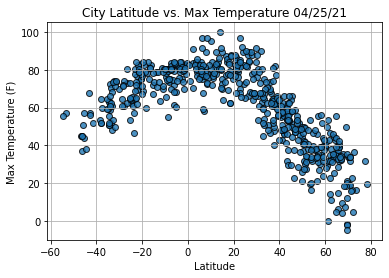

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


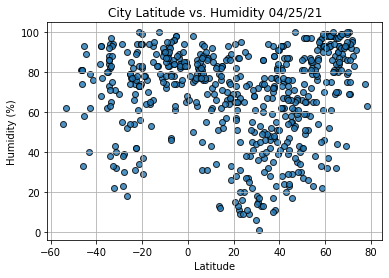

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


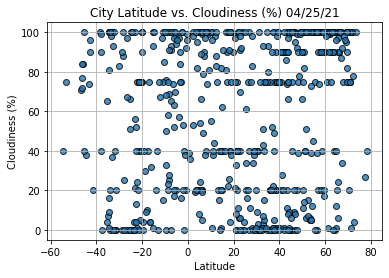

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


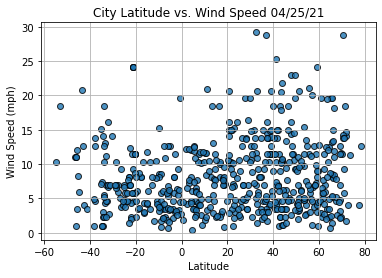

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()